# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on two variational parameters, $\sigma$, which is the width of the two Gaussians under square root, and $\mu$, which represents the distance from the origin of their average values.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 08.1

Write a C++ Variational Monte Carlo code for a single quantum particle in 1D which exploits the Metropolis algorithm to sample a trial wave function $|\Psi_T(x)|^2$ using an uniform transition probability $T(x_{new}|x_{old})$ (Suggestion: as a starting point, you can use the code you have already developed for the Hydrogen atom or the Monte Carlo NVT code). Using data blocking, the code should be able to compute the expectation value for the Hamiltonian

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$

which can be used to find the parameters that minimize this quantity.

The probability density follows,
$$|\Psi_T(x)|^2 \propto e^{-\frac{(x-\mu)^2}{\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{\sigma^2}}+2e^{-\frac{x^2+\mu^2}{\sigma^2}}$$
                               
We can compute the function we want to mediate. 

$$\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}=\frac{(\frac{\hat p ^2}{2m} + \hat V) \Psi _T(x)}{\Psi_T(x)}=\frac{(-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2})\Psi _T(x)}{\Psi_T(x)}+V(x)\frac{\Psi_T(x)}{\Psi_T(x)} $$

Now, the second derivative of the trial w.f. is 

$$\frac{\partial^2}{\partial x^2} \Psi_T(x)=(\frac{x^2+\mu^2}{\sigma^4}-\frac{1}{\sigma^2})\Psi_T(x) + \frac{2 \mu x}{\sigma^4}(e^{-\frac{(x+\mu)^2}{2 \sigma^2}}-e^{-\frac{(x-\mu)^2}{2\sigma^2}})$$

so that the previous expression becomes

$$\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}=V(x)-\frac{\hbar^2}{2m}(\frac{x^2+\mu^2}{\sigma^4}-\frac{1}{\sigma^2})-\frac{\frac{\hbar^2 \mu x}{m \sigma^4}(e^{-\frac{(x+\mu)^2}{2 \sigma^2}}-e^{-\frac{(x-\mu)^2}{2\sigma^2}})}{\Psi_T(x)}=V(x)-\frac{\hbar^2}{2m}(\frac{x^2+\mu^2}{\sigma^4}-\frac{1}{\sigma^2})+\frac{\hbar^2 \mu x}{m\sigma^4}\tanh(\frac{\mu x}{\sigma^2})$$



### Exercise 08.2

Use your Variational Monte Carlo code to find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$:

$$
\langle {\hat H} \rangle_T = \frac{\langle \Psi_T^{\sigma,\mu}| {\hat H} | \Psi_T^{\sigma,\mu} \rangle}
{\langle \Psi_T^{\sigma,\mu} | \Psi_T^{\sigma,\mu} \rangle} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

### Optimization procedure

The following plot represents the energy computation as a function of the optimization parameters $\sigma$ and $\mu$.

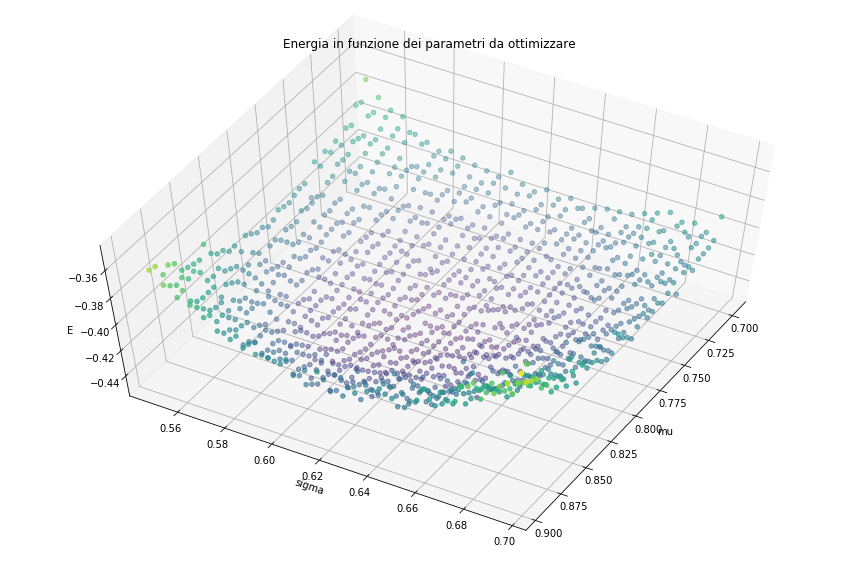

In [2]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

ax= plt.subplot( projection='3d')
mu, sigma, E= np.loadtxt("es/Risultati/Ottimizzazione.dat", usecols=(0,1,2), delimiter='   ', unpack='true')
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('E')
plt.title('Energia in funzione dei parametri da ottimizzare')
ax.view_init(60, 30)
Punti= ax.scatter(mu,sigma,E, c=E)

plt.show()

### Results for the energy of the system


In [3]:
read=open("es/Risultati/parametriFinali.out")

x0=read.readline()
delta=read.readline()
M=read.readline()
N=read.readline()
x_min=read.readline()
x_max=read.readline()
n_bin=read.readline()
mu=read.readline()
sigma=read.readline()
read.close()

mu=float(mu)
sigma=float(sigma)

print("PARAMETRI DELLA SIMULAZIONE \n")
print("Posizione di partenza x_init =",x0)
print("Numero totale di punti M = ",M," e numero di blocchi N =",N)
print("Istogramma realizzato su \n x_min = ",x_min,"x_max = ",x_max)
print("Numero di bin=",n_bin)

print("Parametri ottimizzati:")
print("mu =",mu)
print("sigma =", sigma)

PARAMETRI DELLA SIMULAZIONE 

Posizione di partenza x_init = 0

Numero totale di punti M =  100000
  e numero di blocchi N = 100

Istogramma realizzato su 
 x_min =  -3
 x_max =  3

Numero di bin= 800

Parametri ottimizzati:
mu = 0.79
sigma = 0.615


Energia E= -0.442013
Incertezza = 0.00260814


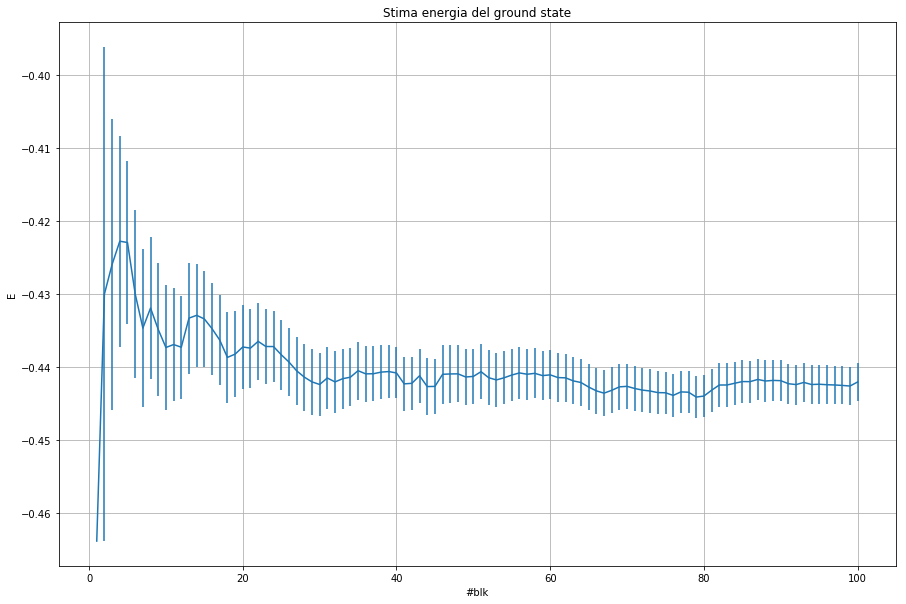

In [11]:
blk, E, error=np.loadtxt("es/Risultati/progressivi.out", usecols=(0,1,2), delimiter='   ', unpack='true')
fig=plt.figure(figsize=(15,10))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.errorbar(blk, E, yerr=error)
plt.grid(True)
plt.title('Stima energia del ground state')
plt.xlabel('#blk')
plt.ylabel('E')
print("Energia E=",E[-1])
print("Incertezza =", error[-1])
plt.show()

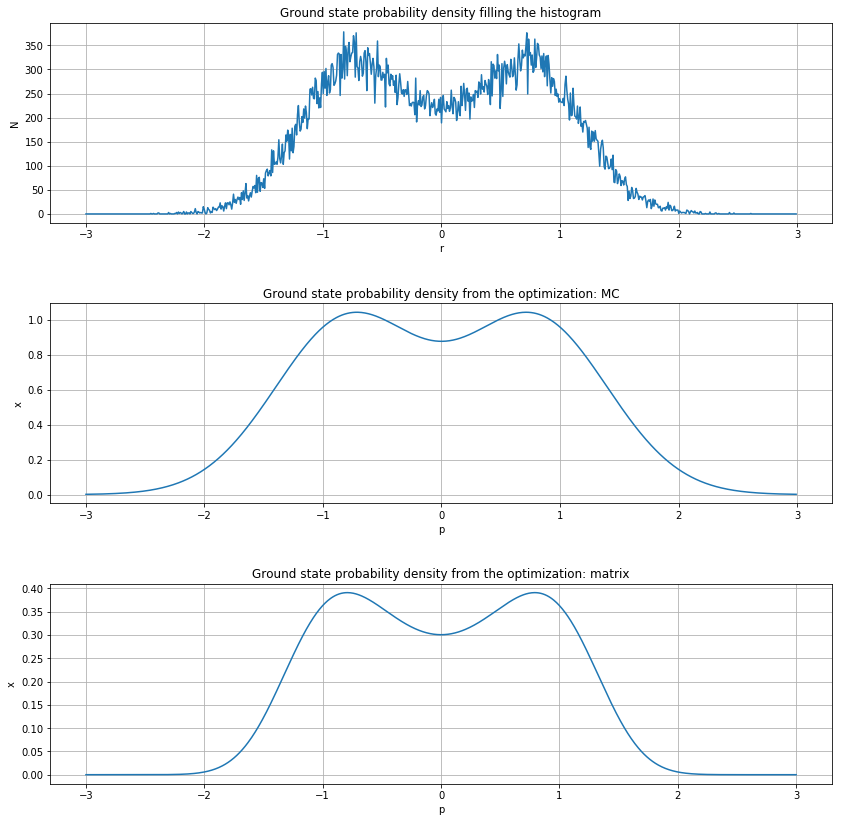

In [12]:
def f(x, m, s):
    return np.exp(-((x-m)**2)/(2*s*s))+np.exp(-((x+m)**2)/(2*s*s))

fig=plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(3,1,1)
r, N = np.loadtxt("es/Risultati/istogramma.out", usecols=(0,1), delimiter='   ', unpack='true')
plt.plot(r, N)
plt.grid(True)
plt.title('Ground state probability density filling the histogram')
plt.xlabel('r')
plt.ylabel('N')

plt.subplot(3,1,2)
y=f(r,mu,sigma)
plt.plot(r,y)
plt.title('Ground state probability density from the optimization: MC')
plt.xlabel('p')
plt.ylabel('x')
plt.grid(True)

plt.subplot(3,1,3)
plt.plot(x,(psi[0])**2)
plt.title('Ground state probability density from the optimization: matrix')
plt.xlabel('p')
plt.ylabel('x')
plt.grid(True)
         
    
plt.show()



### Exercise 08.3

Use the PIMC/PIGS code we have provided to study the same 1D quantum system. Use the PIGS algorithm ($T=0$) to project
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters you have optimized.



### Pigs alghoritmh

The first two plot obtained with the same imaginary time propagation.  

Imaginary time propagation is  imaginaryTimePropagation		8.0



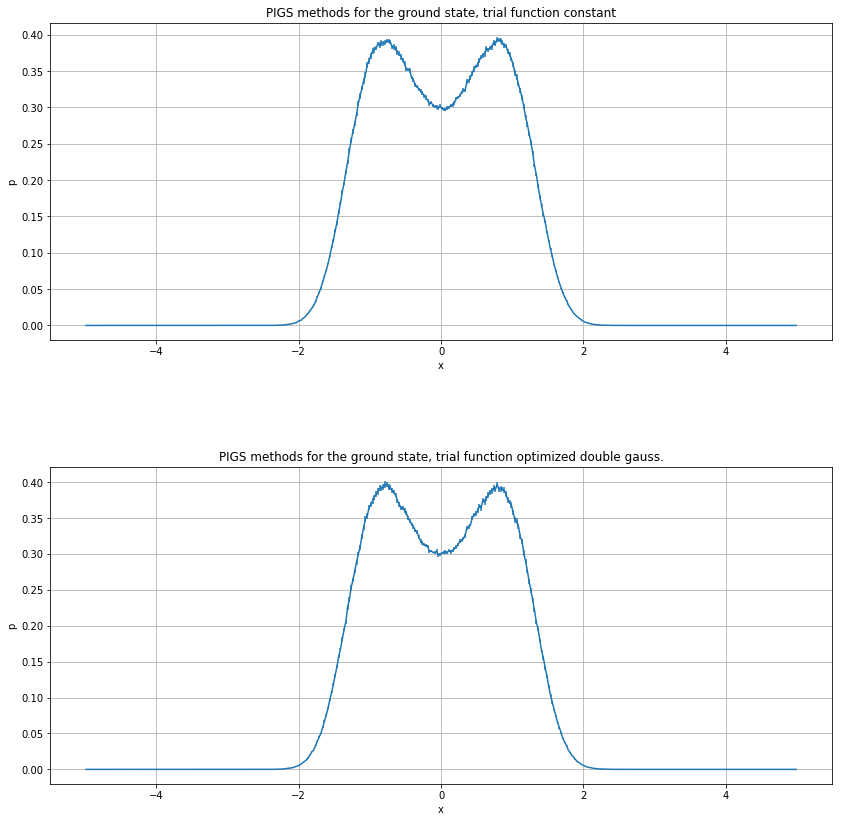

In [13]:
fig=plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

read=open("./QMC_1D/input.pigs")
tau=read.readline()
tau=read.readline()
tau=read.readline()

print("Imaginary time propagation is ", tau)

plt.subplot(2,1,1)
x,n, error=np.loadtxt("./QMC_1D/Risultati/FunctionConst/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIGS methods for the ground state, trial function constant')
plt.xlabel('x')
plt.ylabel('p')

plt.subplot(2,1,2)
x,n, error=np.loadtxt("./QMC_1D/Risultati/FunctionGauss/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIGS methods for the ground state, trial function optimized double gauss.')
plt.xlabel('x')
plt.ylabel('p')
plt.show()


Imaginary time propagation is  imaginaryTimePropagation		8.0



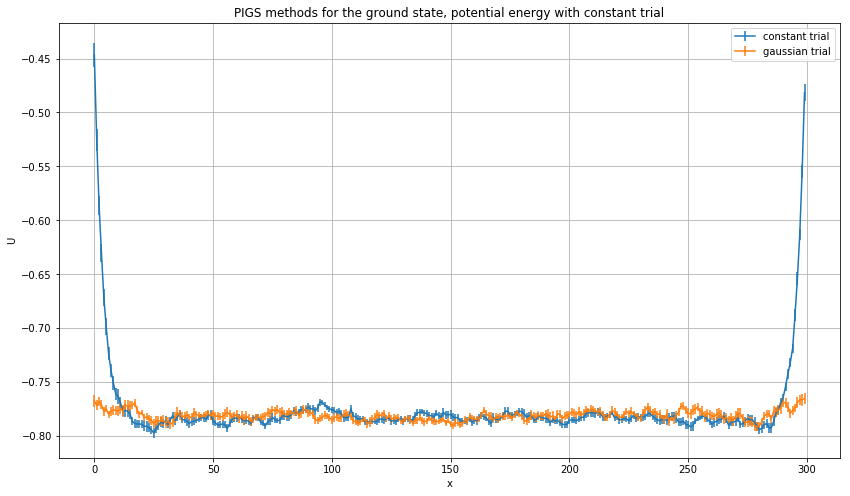

In [19]:
fig=plt.figure(figsize=(14,8))

read=open("./QMC_1D/input.pigs")
tau=read.readline()
tau=read.readline()
tau=read.readline()

print("Imaginary time propagation is ", tau)

x,Uc, error=np.loadtxt("./QMC_1D/Risultati/FunctionConst/potential.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,Uc,yerr=error, label='constant trial')
x,Ug, error=np.loadtxt("./QMC_1D/Risultati/FunctionGauss/potential.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,Ug,yerr=error, label='gaussian trial')
plt.grid(True)
plt.title('PIGS methods for the ground state, potential energy with constant trial')
plt.xlabel('x')
plt.ylabel('U')
plt.legend()
plt.show()


I try now to reduce the imaginary time propagation in the second case.


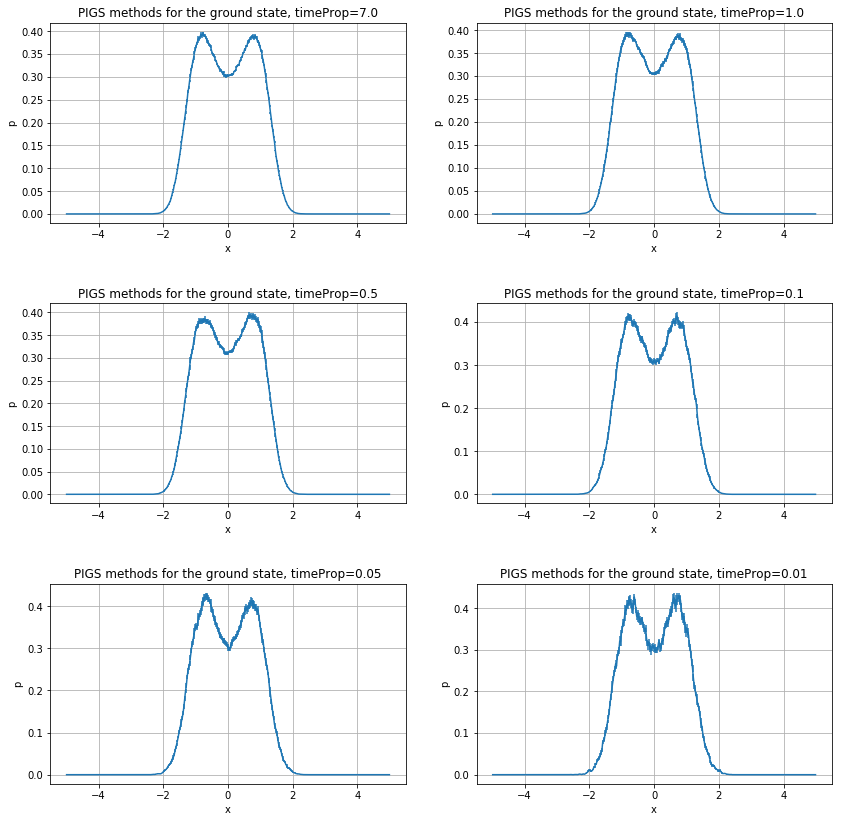

In [8]:
fig=plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(3,2,1)
x,n, error=np.loadtxt("./QMC_1D/Risultati/TimeReducing/time7/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIGS methods for the ground state, timeProp=7.0')
plt.xlabel('x')
plt.ylabel('p')

plt.subplot(3,2,2)
x,n, error=np.loadtxt("./QMC_1D/Risultati/TimeReducing/time1/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIGS methods for the ground state, timeProp=1.0')
plt.xlabel('x')
plt.ylabel('p')

plt.subplot(3,2,3)
x,n, error=np.loadtxt("./QMC_1D/Risultati/TimeReducing/time0.5/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIGS methods for the ground state, timeProp=0.5')
plt.xlabel('x')
plt.ylabel('p')

plt.subplot(3,2,4)
x,n, error=np.loadtxt("./QMC_1D/Risultati/TimeReducing/time0.1/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIGS methods for the ground state, timeProp=0.1')
plt.xlabel('x')
plt.ylabel('p')

plt.subplot(3,2,5)
x,n, error=np.loadtxt("./QMC_1D/Risultati/TimeReducing/time0.05/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIGS methods for the ground state, timeProp=0.05')
plt.xlabel('x')
plt.ylabel('p')

plt.subplot(3,2,6)
x,n, error=np.loadtxt("./QMC_1D/Risultati/TimeReducing/time0.01/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIGS methods for the ground state, timeProp=0.01')
plt.xlabel('x')
plt.ylabel('p')

plt.show()



Starting from a better choice, i.e. the double gaussian function with optimized parameters, we can reduce the imaginary time propagation of a factor 800 and still recognize the ground state. 

### PIMC algorithm for T>0

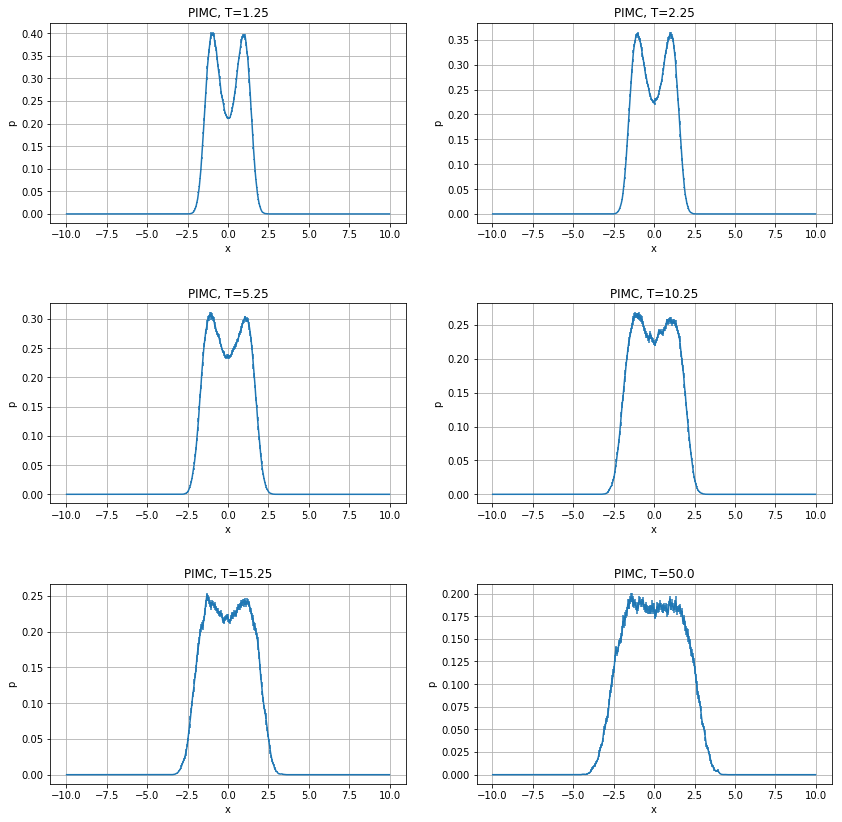

In [9]:
fig=plt.figure(figsize=(14,14))
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(3,2,1)
x,n, error=np.loadtxt("./QMC_1D/Risultati/NonZeroT/T1.25/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIMC, T=1.25')
plt.xlabel('x')
plt.ylabel('p')

plt.subplot(3,2,2)
x,n, error=np.loadtxt("./QMC_1D/Risultati/NonZeroT/T2.25/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIMC, T=2.25')
plt.xlabel('x')
plt.ylabel('p')


plt.subplot(3,2,3)
x,n, error=np.loadtxt("./QMC_1D/Risultati/NonZeroT/T5.25/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIMC, T=5.25')
plt.xlabel('x')
plt.ylabel('p')

plt.subplot(3,2,4)
x,n, error=np.loadtxt("./QMC_1D/Risultati/NonZeroT/T10.25/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIMC, T=10.25')
plt.xlabel('x')
plt.ylabel('p')

plt.subplot(3,2,5)
x,n, error=np.loadtxt("./QMC_1D/Risultati/NonZeroT/T15.25/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIMC, T=15.25')
plt.xlabel('x')
plt.ylabel('p')

plt.subplot(3,2,6)
x,n, error=np.loadtxt("./QMC_1D/Risultati/NonZeroT/T50.0/probability.dat", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(x,n,yerr=error)
plt.grid(True)
plt.title('PIMC, T=50.0')
plt.xlabel('x')
plt.ylabel('p')

plt.show()



### Supplementary material

How can we describe a wave function as a vector? We set up a lattice of discrete points, spaced by a constant distance $dx$, and record the value of the function at each lattice point. In this way the wave function, $\Psi(x)$ become a vector:

$$
\Psi(x) \to \left[ \Psi(x_1), \Psi(x_2), ..., \Psi(x_N) \right] = 
\left[ \Psi_1, \Psi_2, ..., \Psi_N \right]
$$

The time independent Schrodinger equation 

$$
{\hat H} \Psi(x) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x) \right) \Psi(x) = E \Psi(x)
$$

can be written in matrix form. But how do we write the second derivative at a particular point? Let's start with the first derivatives:
$$
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) \simeq \frac{\Psi_{i+1}-\Psi_{i}}{dx}\\
\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right) \simeq \frac{\Psi_{i}-\Psi_{i-1}}{dx}
$$

Thus, we can discretize the second derivative in the following way:
$$
\frac{\partial^2}{\partial x^2} \Psi(x=x_i) =
\frac{\frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i+1})/2\right) - \frac{\partial}{\partial x} \Psi\left(x=(x_i+x_{i-1})/2\right)}{dx} =
\frac{\Psi_{i+1}-2\Psi_{i}+\Psi_{i-1}}{dx^2}
$$

We finally obtain:

$$
\begin{bmatrix}
 \frac{\hbar^2}{m\,dx^2}+V(x_1)& -\frac{\hbar^2}{2m\,dx^2} & 0 & \dots  & 0 \\
-\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_2) & -\frac{\hbar^2}{2m\,dx^2} & \dots  & 0 \\
 0                        & -\frac{\hbar^2}{2m\,dx^2} & \frac{\hbar^2}{m\,dx^2}+V(x_3) & \dots  & 0 \\
 \vdots                   & \vdots                    & \vdots & \ddots & \vdots \\
 0                    & 0                & 0 & \dots  & \frac{\hbar^2}{m\,dx^2}+V(x_N)
\end{bmatrix}
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
= E
\begin{bmatrix}
\Psi_{1} \\
\Psi_{2} \\
\vdots \\
\Psi_{N}
\end{bmatrix}
$$

To solve the time independent Schrodinger equation we therefore have to find eigenstates and eigenvalues of the matrix just obtained.

Ground state energy:  -0.4604584507991171
1st excited state energy:  0.09744706661807404
2nd excited state energy:  1.971807737383004


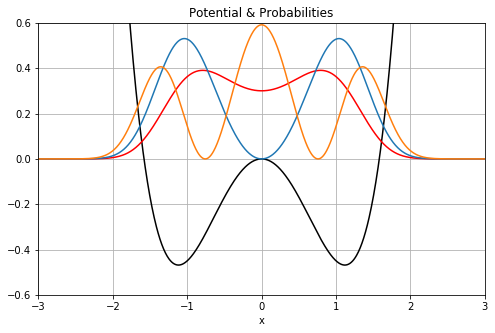

In [10]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 6
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)


print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential
plt.plot(x,(psi[0])**2, color='r')
plt.plot(x,(psi[1])**2)
plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()